# Allianz Pricing: From Data Preparation to Risk Modeling (Data Preparation Part)

## 1. Data preparation

**[Insert Context for Task 1]**

In this task, we will discuss the need of data in the insurance context and how to practically prepare it for statistical analysis. Also, we will do some basic but practical common checks on claims and policy data.

## Good to know

This project assumes you have a solid foundation in Python, statistics, and machine learning. Before attempting this project, it is recommended that you complete the prerequisite courses.

**[Insert Instructions Below]**
- Before merging the policy data and claim data, check if the `IDpol` duplicates in both data sets. If yes, aggregate separate policies whose `IDpol` are same into one single policy.
- Re-define the columns `IDpol` and `ClaimNb` as `int`. 
- Merge the policy and claim data (merging key: `IDpol`). For policies that don't have `ClaimAmount`, fill them with 0.

### Comment: 
- No duplicated ID on policy or Claim.
- I decided not to work with indices
- A few claims were not merged. 
- I noticed that the number of claims in the Policy data doesn't match the number of rows in Claims.  At this point I can't point out what the culprit is.
- The total Claim Amount is the same before (Claims) an after aggregating (Pol_claim)
- Some policies have claims but amount 0.  Are these claims without coverage or duplicates?

### Sample Code

In [7]:
import pandas as pd
# create data dictionary 
data_dic = pd.DataFrame.from_dict({
    'IDpol': 'policy number (unique identifier)',
    'ClaimNb': 'number of claims on the given policy',
    'Exposure': 'total exposure in yearly units',
    'Area': 'area code (categorical, ordinal)',
    'VehPower': 'power of the car (categorical, ordinal)',
    'VehAge': 'age of the car in years',
    'DrivAge': 'age of the (most common) driver in years',
    'BonusMalus': 'bonus-malus level between 50 and 230 (with base level 100)',
    'VehBrand': 'car brand (categorical, nominal)',
    'VehGas': 'diesel or regular fuel car (binary)',
    'Density': 'density of inhabitants per km square in the city of the living place of the driver',
    'Region': 'regions',
    'ClaimAmount': 'claim amount on the given policy'}, 
    orient='index', columns=['definition'])

# load both claim and policy data
pol_db = pd.read_csv("datasets/policy_db.csv")
clm_db = pd.read_csv("datasets/claim_db.csv")

#### Check duplicates

In [9]:
sum(pol_db['IDpol'].duplicated()) 

0

In [10]:
print("No duplicated policy ID in policy data") if (sum(pol_db['IDpol'].duplicated()) == 0) else print("Policy ID duplicates in policy data")
print("No duplicated policy ID in claim data") if (sum(clm_db['IDpol'].duplicated()) == 0) else print("Policy ID duplicates in claims data")

No duplicated policy ID in policy data
Policy ID duplicates in claims data


#### Check the total sum before aggregating

In [12]:
total_before = sum(clm_db['ClaimAmount'])
total_before

60697930.679998256

In [13]:
total_after = sum(clm_db.groupby(by='IDpol').sum()['ClaimAmount'])
abs(total_before - total_after) < 1

True

#### Claims: Aggregate by IDPol.  In Policy data ID is unique

In [15]:
# aggregate claim amount from same policy
# aggregate separate policies whose `IDpol` are same into one single policy
clm_db = clm_db.groupby(by='IDpol').sum()
clm_db.reset_index(inplace=True)

In [16]:
clm_db.head(3)

,IDpol,ClaimAmount
0,139.0,303.00
1,190.0,1981.84
2,414.0,1456.55


In [17]:
sum(clm_db['IDpol'].duplicated()) 

0

In [18]:
pol_db.dtypes

IDpol         float64
ClaimNb       float64
Exposure      float64
Area           object
VehPower      float64
VehAge        float64
DrivAge       float64
BonusMalus    float64
VehBrand       object
VehGas         object
Density       float64
Region         object
dtype: object

In [19]:
# Re-define the columns `IDpol` and `ClaimNb` as `int`.
pol_db["IDpol"]  = pol_db["IDpol"].astype(int)
pol_db["ClaimNb"] = pol_db["ClaimNb"].astype(int)


In [20]:
pol_db.dtypes

IDpol           int64
ClaimNb         int64
Exposure      float64
Area           object
VehPower      float64
VehAge        float64
DrivAge       float64
BonusMalus    float64
VehBrand       object
VehGas         object
Density       float64
Region         object
dtype: object

#### Merge
I decide not to work with indexes

In [22]:
# merge freq & sev datasets
#pol_db.set_index("IDpol", inplace=True)
pol_clm_db = pol_db.merge(clm_db, how="left", on = 'IDpol')
pol_clm_db.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1,1,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,NaN
1,3,1,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,NaN
2,5,1,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,NaN
3,10,1,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,NaN
4,11,1,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,NaN


In [23]:
pol_clm_db.dropna(subset=['ClaimAmount'])

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
66,139,1,0.75,F,7.0,1.0,61.0,50.0,B12,Regular,27000.0,R11,303.00
93,190,1,0.14,B,12.0,5.0,50.0,60.0,B12,Diesel,56.0,R25,1981.84
199,414,1,0.14,E,4.0,0.0,36.0,85.0,B12,Regular,4792.0,R11,1456.55
205,424,2,0.62,F,10.0,0.0,51.0,100.0,B12,Regular,27000.0,R11,10834.00
223,463,1,0.31,A,5.0,0.0,45.0,50.0,B12,Regular,12.0,R73,3986.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
677203,6113521,1,0.18,C,4.0,1.0,26.0,60.0,B12,Diesel,311.0,R82,1324.40
677475,6113793,1,0.14,C,7.0,2.0,51.0,50.0,B12,Diesel,178.0,R72,1769.88
677499,6113817,1,0.17,D,4.0,0.0,35.0,51.0,B12,Regular,1719.0,R82,1288.28
677516,6113834,2,0.17,C,15.0,3.0,36.0,50.0,B12,Regular,181.0,R54,12230.40


#### Not Merged
Some claims , six in total, were not merged

In [25]:
len(clm_db) 

24950

#### Difference in ClaimNr and origina Claims n rows
Q: and does 'ClaimNr' match the original n claims?
- No, dive into this later

In [27]:
pol_db['ClaimNb'].sum()

36102

In [28]:
36102-24950

11152

In [29]:
claims_original = pd.read_csv("datasets/claim_db.csv")

In [30]:
len(claims_original)

26639

In [31]:
# Policies without claim amount are filled with 0
pol_clm_db["ClaimAmount"].fillna(0, inplace = True)
pol_clm_db.reset_index(inplace=True)
pol_clm_db.head()  #OK

,index,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,0,1,1,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
1,1,3,1,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
2,2,5,1,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,0.0
3,3,10,1,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0
4,4,11,1,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0


#### Check ClaimNb vs Amount:

#####  ClaimNr > 0 and Amount 0
Q: are there policies with ClaimNr > 0 and Amount 0?

- Yes; this can be explained in part by claims that are not covered, also with the claims difference with the original.

In [34]:
len(pol_clm_db[pol_clm_db["ClaimNb"]>0][pol_clm_db['ClaimAmount'] == 0])

/tmp/ipykernel_172/2801142801.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pol_clm_db[pol_clm_db["ClaimNb"]>0][pol_clm_db['ClaimAmount'] == 0])


9116

##### ClaimNr = 0 and Amount != 0
Q: and the other way around: Are there policies with Amount and 0 Nclaims?
- No. ok

In [36]:
len(pol_clm_db[pol_clm_db["ClaimNb"] == 0][pol_clm_db['ClaimAmount'] > 0]) #no, ok

/tmp/ipykernel_172/3900675613.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pol_clm_db[pol_clm_db["ClaimNb"] == 0][pol_clm_db['ClaimAmount'] > 0]) #no, ok


0

## 2. Inspect the dataset

**[Insert Context for Task 2]**

Get familiar with the new merged dataset.

**[Instructions]**

- Use pandas dataframe.info() method to have a initial review on data information. 
- Check whether the number of rows remain the same after the data merge. 
- Check whether missing value exists.

### Comment
All rows remain. (The number of rows remains the same after merging). There are no missing values on any column


### Sample Code

In [42]:
pol_clm_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        678013 non-null  int64  
 1   IDpol        678013 non-null  int64  
 2   ClaimNb      678013 non-null  int64  
 3   Exposure     678013 non-null  float64
 4   Area         678013 non-null  object 
 5   VehPower     678013 non-null  float64
 6   VehAge       678013 non-null  float64
 7   DrivAge      678013 non-null  float64
 8   BonusMalus   678013 non-null  float64
 9   VehBrand     678013 non-null  object 
 10  VehGas       678013 non-null  object 
 11  Density      678013 non-null  float64
 12  Region       678013 non-null  object 
 13  ClaimAmount  678013 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 72.4+ MB


The number of rows remains the same after merging

In [44]:
len(pol_db) == len(pol_clm_db) 

True

Are there missing values?

In [46]:
pol_clm_db[ pol_clm_db.isna().any(axis = 1) ]  #none

,index,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount


## 3. Preliminary data overview

**[Replace with Context for Task 3]**

Get the basic KPI for the policy-claim data.

**[Instructions]**

- Group the data (`pol_clm_db`) with respect to the number of claims(`ClaimNb`) and calculate the total exposures (`Exposure`) and number of policies at each sub-group level of "number of claims (`ClaimNb`)".
- Calculate the overall portfolio frequency, i.e. total number of claims divided by total exposure.

### Comment
- There are policies with exposure > 1
- Capping the exposure to 1 does not change the overall frequency of the portfolio.
- The number of claims still needs to be investigated


In [51]:
pol_clm_db['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
6          1
8          1
16         1
9          1
Name: ClaimNb, dtype: int64

### Calculate Exposure and total ClaimNr for ClaimNr

In [53]:
pol_clm_db.groupby('ClaimNb').sum()[['Exposure']]

,Exposure
ClaimNb,
0,336616.059770
1,20670.757404
2,1153.418289
3,52.760000
4,3.070000
5,1.080000
6,0.330000
8,0.410000
9,0.080000


In [54]:
pol_clm_db.groupby('ClaimNb').count()[['IDpol']]

,IDpol
ClaimNb,
0,643953
1,32178
2,1784
3,82
4,7
5,2
6,1
8,1
9,1


### Visualize Exposure
#### there are policies with Exp >1

<AxesSubplot:>

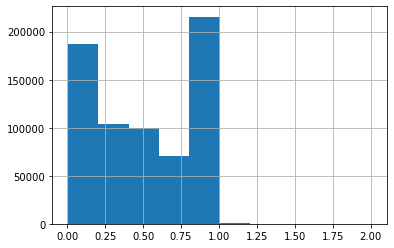

In [56]:
pol_clm_db['Exposure'].hist()

In [57]:
len(pol_clm_db[pol_clm_db['Exposure'] > 1])

1224

### Overall portfolio frequency: 0.1007

##### big disclaimer:  this is given the exposures and ClaimNr so as they are

In [60]:
pol_clm_db['ClaimNb'].sum() / pol_clm_db['Exposure'].sum()

0.10070308464041304

In [61]:
#pol_clm_db.sort_values(by = 'Exposure', ascending = False)

### Make a new Exposure column capping the values to 1

In [63]:
pol_clm_db['Exposure2']= pol_clm_db['Exposure']

In [64]:
pol_clm_db.loc[pol_clm_db['Exposure2']>1, 'Exposure2'] = 1

In [65]:
pol_clm_db.sort_values(by = 'Exposure', ascending = False)

,index,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,Exposure2
198847,198847,1198848,0,2.010000,D,4.0,14.0,78.0,50.0,B1,Regular,824.0,R91,0.00,1.000000
198144,198144,1198145,0,2.010000,C,5.0,0.0,59.0,50.0,B3,Regular,239.0,R41,0.00,1.000000
198478,198478,1198479,1,2.000000,C,10.0,11.0,32.0,50.0,B13,Regular,373.0,R91,72.96,1.000000
179652,179652,1179653,0,1.990000,A,11.0,10.0,50.0,50.0,B12,Regular,29.0,R25,0.00,1.000000
197024,197024,1197025,0,1.980000,D,4.0,22.0,71.0,50.0,B1,Regular,1445.0,R72,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22054,22054,47988,0,0.002732,D,7.0,0.0,39.0,51.0,B3,Diesel,1265.0,R54,0.00,0.002732
22289,22289,48441,0,0.002732,D,6.0,6.0,26.0,147.0,B2,Diesel,1192.0,R53,0.00,0.002732
22523,22523,48856,0,0.002732,C,5.0,3.0,22.0,90.0,B3,Diesel,461.0,R53,0.00,0.002732
22573,22573,48951,0,0.002732,D,6.0,8.0,27.0,76.0,B1,Diesel,983.0,R52,0.00,0.002732


array([[<AxesSubplot:title={'center':'Exposure'}>,
        <AxesSubplot:title={'center':'Exposure2'}>]], dtype=object)

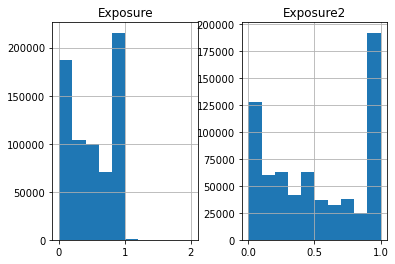

In [66]:
pol_clm_db[ ['Exposure','Exposure2']].hist()

### Frequency with Exposure capped at 1: 0.10074

In [68]:
pol_clm_db['ClaimNb'].sum() / pol_clm_db['Exposure2'].sum()

0.10074224069489535

## 4. Further analysis of the data

### Renewals and Policies belonging to the same policy holder

**[Insert Context for Task 4]**

Determine whether policy renewal has happened during the year.

**[Instructions]**


- For policy whose exposure is equal to 1 year, what is the percentage of such policy. __Please note that the data used in this project only covers one whole calendar year.__ That means, if a policy has been renewed in reality but in our data set it's recorded as two separate policy. We can find their sum of exposure is 1. We can use this fact to detect whether policy renewal has happened.
- Is the answer from (1) seems rather unusual? In practice, policies belonging to the same policy holder should share the same policy ID and is noted as new business or renewal. But we don't have such granular information in this dataset.
- Determine whether the data set follow the practice mentioned above that same policy holder uses the same policy ID. If a policy had been renewed and was indeed recorded as two separate ones in this dataset, then the sum of their exposure should be 1.

**[Insert Hints Below]**

- groupby 'Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', sum the exposure and count the number for each sub-group level. It's highly likely that same policy holder should share the same features.

### Sample Code

### Comment
- Policies with the same characteristics were grouped as a policy holder
- Roughly 25% of the rows were grouped
- However some of the rows have (much) more than one year of exposure which should not be happening

### percentage of 1 year policies, direct

#### only 25%

In [78]:
sum(pol_clm_db['Exposure']==1) / len(pol_clm_db) 

0.2479672218674273

In [79]:
pol_clm_db.head(1)


,index,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,Exposure2
0,0,1,1,0.1,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0,0.1


### Create new set with policy-holder groups

In [81]:
grouping_fields = ['Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region']
unique_feat = pol_clm_db.groupby(by = grouping_fields).agg({'Exposure':['sum','count']})
unique_feat.columns
unique_feat.sort_values(by = ('Exposure',   'count'), ascending = False)


Exposure  \
                                                                             sum   
Area VehPower VehAge DrivAge BonusMalus VehBrand VehGas  Density Region            
B    9.0      3.0    35.0    64.0       B2       Regular 92.0    R72       14.52   
E    6.0      11.0   31.0    50.0       B2       Diesel  4348.0  R72        3.78   
     5.0      2.0    40.0    50.0       B2       Diesel  4059.0  R23        1.18   
D    4.0      12.0   52.0    50.0       B1       Regular 824.0   R91        3.16   
C    6.0      5.0    51.0    50.0       B2       Diesel  269.0   R91       11.64   
...                                                                          ...   
     5.0      11.0   35.0    50.0       B2       Diesel  141.0   R82        0.01   
                                                         133.0   R53        1.00   
                                                         117.0   R25        1.00   
                     34.0    133.0      B2       Diesel  175.0   R82        0.12   
F    15.0     15.0   28.0    95.0       B12      Regular 27000.0 R11        0.55   

                                                                               
                                                                        count  
Area VehPower VehAge DrivAge BonusMalus VehBrand VehGas  Density Region        
B    9.0      3.0    35.0    64.0       B2       Regular 92.0    R72       22  
E    6.0      11.0   31.0    50.0       B2       Diesel  4348.0  R72       18  
     5.0      2.0    40.0    50.0       B2       Diesel  4059.0  R23       15  
D    4.0      12.0   52.0    50.0       B1       Regular 824.0   R91       15  
C    6.0      5.0    51.0    50.0       B2       Diesel  269.0   R91       15  
...                                                                       ...  
     5.0      11.0   35.0    50.0       B2       Diesel  141.0   R82        1  
                                                         133.0   R53        1  
                                                         117.0   R25        1  
                     34.0    133.0      B2       Diesel  175.0   R82        1  
F    15.0     15.0   28.0    95.0       B12      Regular 27000.0 R11        1  

[528765 rows x 2 columns]

#### 25% of the rows were grouped

In [83]:
528765/ 678013 

0.7798744271864994

<AxesSubplot:>

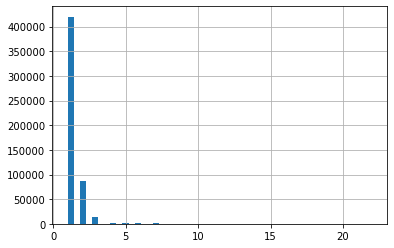

In [84]:
unique_feat[('Exposure',   'count')].hist(bins = 50)

#### Problem
##### It seems that there are too many instances of some of the unique individuals (22 for example).
##### the exposure then added is way greater than 1,  it seems that this method of detencting individual policies does not tackte the problem fully


#### Policy holders with sum of exposure == 1, 32%

In [87]:
(unique_feat[unique_feat[('Exposure',   'sum')] ==1].count() )/ (unique_feat.count() )

Exposure  sum      0.311904
          count    0.311904
dtype: float64

## 5. Exploratory data analysis

### Dealing with Exposure >1 and claims > 4

**[Context for Task 5]**

In this task, we will discuss how to modify the rating factors in order to make them usable for risk modeling. Also, we will introduce how to perform a univariate/multivariate analysis of each rating factor in terms of volumes and observed frequency/severity, which lay the ground for exploring dependence structure among feature components and for risk modeling as well.



**[Add instructions]**

- Plot empirical distribution for `Exposure` and `CliamNb`. Please also plot empirical distribution for those policies whose `Exposure` > 1 and `ClaimNb` > 4.

### Sample Code

#### ClaimNb looks already like a Poisson variable

array([[<AxesSubplot:title={'center':'Exposure'}>,
        <AxesSubplot:title={'center':'ClaimNb'}>]], dtype=object)

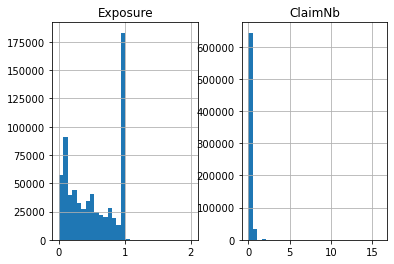

In [94]:
pol_clm_db[['Exposure','ClaimNb']].hist(bins = 30)

#### Plots for Exposure > 1 and ClaimNb > 4.

##### there are no policies with both conditions.
I will check one by one

In [97]:
pol_clm_db[pol_clm_db['Exposure']>1]['ClaimNb'].describe()


count    1224.000000
mean        0.044118
std         0.217052
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ClaimNb, dtype: float64

##### Plots for Exposure > 1 

array([[<AxesSubplot:title={'center':'Exposure'}>,
        <AxesSubplot:title={'center':'ClaimNb'}>]], dtype=object)

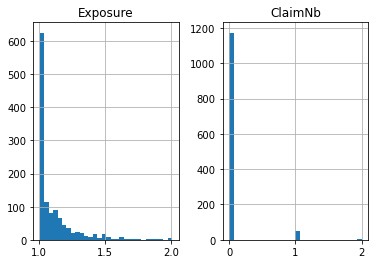

In [99]:
pol_clm_db[pol_clm_db['Exposure']>1][['Exposure','ClaimNb']].hist(bins = 30)

##### Plots for Claim Nr > 4

array([[<AxesSubplot:title={'center':'Exposure'}>,
        <AxesSubplot:title={'center':'ClaimNb'}>]], dtype=object)

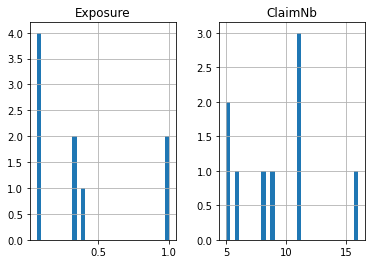

In [101]:
pol_clm_db[pol_clm_db['ClaimNb']>4][['Exposure','ClaimNb']].hist(bins = 30)

## 6. Explanatory variables: duplicates (bonus | difficult)

**[Context for Task 6]**

Comment based on the plots from last question: 
- A significant number of policies have low Exposure, i.e. close to zero.
- Distribution of values is reasonable except that a spike (exposure = 0.08) occurs in `Exposure` plot (top left graph). We will further investigate it in the section below.


Let's further look into two potential data errors: 

1. Policies belonging to the same policy holder should normally share same policy ID and be aggregated; Otherwise, when modelling, it will violate the assumption of independent sample.

2. Duplicated policy: some policy is split into two parts where the sum of exposure equals the other policy(different `IDpol`) in this dataset.

we don't fix the error above since it requires more granular information and dedicated efforts, which is not the main aim of this project.

**[Add instructions]**

Find any example/policy that might belong to the same policy holder.

### Comment
- I have a new dataset with the rows of all policy holders.
- The explanation of the difference in number of claims seems to be in the policy-holder grouping.
- the problem of the large exposures remains


### Sample Code

In [107]:
pol_clm_db[pol_clm_db[grouping_fields].duplicated()]['IDpol']

1               3
4              11
6              15
8              18
10             25
           ...   
677922    6114240
677946    6114264
677948    6114266
677974    6114292
677996    6114314
Name: IDpol, Length: 149248, dtype: int64

#### From the grouped set, identify those with more than one row. 
#### and merge the column repeated with the original dataset

In [109]:
feat = unique_feat.sort_values(by = ('Exposure',   'count'), ascending = False).reset_index()

In [110]:
feat = feat[ feat[('Exposure',   'count')] > 1]
feat['counts_feat'] = feat[('Exposure',   'count')]
feat['sum_exp'] = feat[('Exposure',   'sum')]
feat = feat.drop( ('Exposure',   'sum') , axis = 1)
feat = feat.drop( ('Exposure',   'count') , axis = 1)
feat['repeated'] = 1
feat.sort_values(by = grouping_fields, ascending = True)



,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,counts_feat,sum_exp,repeated
,,,,,,,,,,,,
82086,A,4.0,0.0,19.0,95.0,B12,Regular,28.0,R54,2,0.09,1
20512,A,4.0,0.0,19.0,100.0,B12,Diesel,20.0,R73,3,0.23,1
82084,A,4.0,0.0,20.0,100.0,B12,Regular,13.0,R72,2,0.36,1
82082,A,4.0,0.0,21.0,90.0,B12,Regular,12.0,R73,2,0.16,1
82080,A,4.0,0.0,21.0,100.0,B1,Regular,21.0,R26,2,0.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20577,F,15.0,4.0,56.0,50.0,B3,Regular,15703.0,R11,3,0.70,1
82093,F,15.0,4.0,58.0,50.0,B12,Regular,27000.0,R11,2,0.99,1
82099,F,15.0,5.0,32.0,64.0,B12,Regular,27000.0,R11,2,0.31,1


### Merge the full dataset by all these to find the repeated

In [112]:
repeated_pol = pol_clm_db.merge(feat, on = grouping_fields, how = 'left')

/tmp/ipykernel_172/4265164045.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  repeated_pol = pol_clm_db.merge(feat, on = grouping_fields, how = 'left')
/tmp/ipykernel_172/4265164045.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  repeated_pol = pol_clm_db.merge(feat, on = grouping_fields, how = 'left')


In [113]:
repeated_pol.columns
repeated_pol = repeated_pol[ repeated_pol[('repeated', '')] == 1 ]

### View rows with the same characteristics

In [115]:
repeated_pol.sort_values(by = grouping_fields, ascending = True)

,index,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,Exposure2,"(counts_feat, )","(sum_exp, )","(repeated, )"
639673,639673,5107815,0,0.03,A,4.0,0.0,19.0,95.0,B12,Regular,28.0,R54,0.0,0.03,2.0,0.09,1.0
639674,639674,5107816,0,0.06,A,4.0,0.0,19.0,95.0,B12,Regular,28.0,R54,0.0,0.06,2.0,0.09,1.0
514181,514181,4063566,0,0.03,A,4.0,0.0,19.0,100.0,B12,Diesel,20.0,R73,0.0,0.03,3.0,0.23,1.0
514182,514182,4063568,0,0.02,A,4.0,0.0,19.0,100.0,B12,Diesel,20.0,R73,0.0,0.02,3.0,0.23,1.0
514183,514183,4063569,0,0.18,A,4.0,0.0,19.0,100.0,B12,Diesel,20.0,R73,0.0,0.18,3.0,0.23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576975,576975,4168153,0,0.28,F,15.0,5.0,32.0,64.0,B12,Regular,27000.0,R11,0.0,0.28,2.0,0.31,1.0
670767,670767,6104233,0,0.70,F,15.0,5.0,42.0,50.0,B12,Regular,15703.0,R11,0.0,0.70,2.0,0.74,1.0
670768,670768,6104236,0,0.04,F,15.0,5.0,42.0,50.0,B12,Regular,15703.0,R11,0.0,0.04,2.0,0.74,1.0
576961,576961,4168139,0,0.21,F,15.0,6.0,58.0,50.0,B10,Regular,12374.0,R11,0.0,0.21,2.0,0.46,1.0


### New Number of claims

The number of claims in the repeated dataset is very close to the number of mismatched extra claims

In [117]:
### how many claims are repeated (in the repeated set)
ClaimNbrep = repeated_pol['ClaimNb'].sum()
ClaimNbrep


10051

In [118]:
pol_clm_db['ClaimNb'].sum() - ClaimNbrep

26051

In [119]:
len(claims_original)

26639

### this seems to be the solution for the difference in claims in the two files

##### An alternative to the analysis would be to keep the rows grouped and not summing up the ClaimNb of the rows. 
I decide not to do this because I do not yet know how to explain the exposures larger than 12

## 7. Abnormal behavior

**[Context for Task 7]**

As mentioned previously, there is a spike in exposure histogram where exposure = 0.08. Figure out potential reasons for this abnormal behavior.

**[Add Instructions]**

- Figure out potential reasons for this abnormal behavior.

### Comment
- Policies of about a month, can be a grace period.
- We see that they are newer cars and of a specific brand.
    - Rental cars or a fleet

### Sample Code

array([[<AxesSubplot:title={'center':'Exposure'}>]], dtype=object)

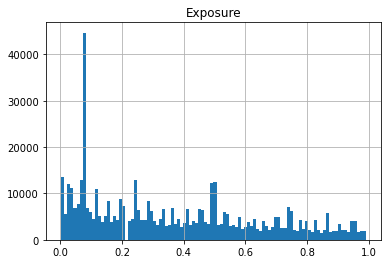

In [127]:
pol_clm_db[pol_clm_db['Exposure']<1].hist(bins=100, column='Exposure')


In [128]:
365*.08

29.2

#### It's roughly a month  -  

##### Grace period?
##### rental car?


### describe all variables for policies in the spike Vs not in the spike (numeric)

In [131]:
not_08 = pol_clm_db[ pol_clm_db['Exposure']!=0.8 ]
not_08.describe()

,index,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,Exposure2
count,674036.000000,6.740360e+05,674036.000000,674036.000000,674036.000000,674036.000000,674036.000000,674036.000000,674036.000000,6.740360e+05,674036.000000
mean,338953.650901,2.620828e+06,0.053159,0.527150,6.454667,7.053454,45.496071,59.763395,1791.837571,8.825967e+01,0.526943
std,195730.588250,1.642239e+06,0.239975,0.364917,2.050545,5.668845,14.139745,15.638858,3958.620158,5.839086e+03,0.364554
min,0.000000,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.002732
25%,169380.750000,1.157680e+06,0.000000,0.170000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.170000
50%,338780.500000,2.271926e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.490000
75%,508365.250000,4.045868e+06,0.000000,1.000000,7.000000,11.000000,55.000000,64.000000,1635.000000,0.000000e+00,1.000000
max,678012.000000,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,1.000000


In [132]:
yes_08 = pol_clm_db[ pol_clm_db['Exposure']==0.8 ]
yes_08.describe()

,index,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,Exposure2
count,3977.000000,3.977000e+03,3977.000000,3.977000e+03,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3.977000e+03
mean,347878.310033,2.796195e+06,0.068142,8.000000e-01,6.448579,5.486799,46.016093,59.440533,1891.542117,105.361323,8.000000e-01
std,194706.123139,1.552868e+06,0.262769,4.408140e-14,2.111441,4.964957,13.733917,15.257631,3962.370453,1014.611562,4.408140e-14
min,32.000000,6.700000e+01,0.000000,8.000000e-01,4.000000,0.000000,18.000000,50.000000,3.000000,0.000000,8.000000e-01
25%,199941.000000,2.001668e+06,0.000000,8.000000e-01,5.000000,2.000000,35.000000,50.000000,103.000000,0.000000,8.000000e-01
50%,362288.000000,3.012230e+06,0.000000,8.000000e-01,6.000000,4.000000,45.000000,50.000000,411.000000,0.000000,8.000000e-01
75%,551080.000000,4.142258e+06,0.000000,8.000000e-01,7.000000,9.000000,55.000000,64.000000,1955.000000,0.000000,8.000000e-01
max,631517.000000,5.091173e+06,2.000000,8.000000e-01,15.000000,30.000000,95.000000,156.000000,27000.000000,43742.040000,8.000000e-01


##### only the vehicle age seem slighlty different (newer cars)

test of difference

In [135]:
from scipy import stats
c1 = not_08['VehAge']
c2 = yes_08['VehAge']

stat_v,p_v = stats.ks_2samp(c1,c2)
print(stat_v, p_v)

0.1487855786764734 7.172087671739524e-77


### Categorical

##### Veh Brand is also different.  (most are B12)

array([[<AxesSubplot:title={'center':'DrivAge'}>,
        <AxesSubplot:title={'center':'VehAge'}>]], dtype=object)

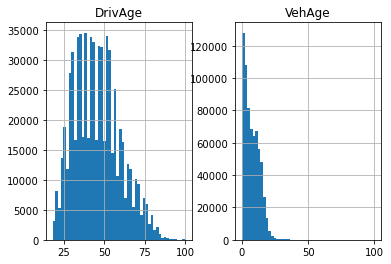

In [138]:
not_08[['DrivAge','VehAge']].hist(bins = 50)

array([[<AxesSubplot:title={'center':'DrivAge'}>,
        <AxesSubplot:title={'center':'VehAge'}>]], dtype=object)

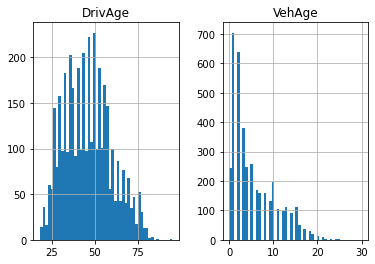

In [139]:
yes_08[['DrivAge','VehAge']].hist(bins = 50)

<AxesSubplot:>

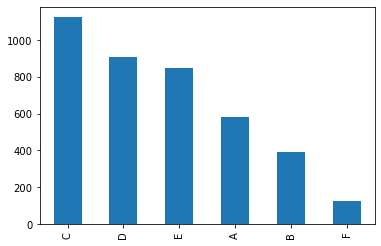

In [140]:
import matplotlib.pyplot as plt

counts_yes08 = yes_08['Area'].value_counts()
counts_yes08.plot(kind = 'bar')

<AxesSubplot:>

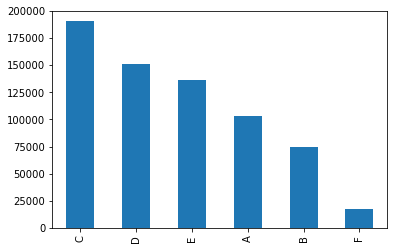

In [141]:
counts_no08 = not_08['Area'].value_counts()
counts_no08.plot(kind = 'bar')

#,'Area','Region','VehBrand'

<AxesSubplot:>

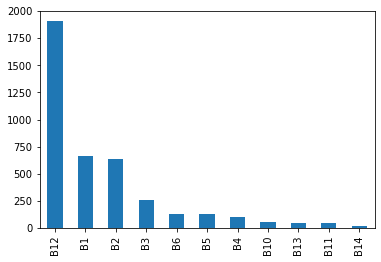

In [142]:
counts_yes08 = yes_08['VehBrand'].value_counts()
counts_yes08.plot(kind = 'bar')

<AxesSubplot:>

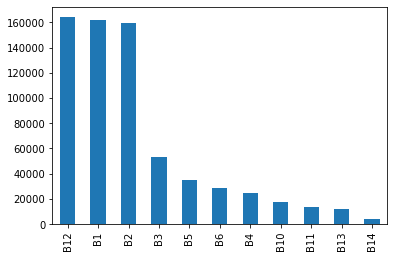

In [143]:
counts_no08 = not_08['VehBrand'].value_counts()
counts_no08.plot(kind = 'bar')

Rental cars fit both VehAge and Brand differences

<AxesSubplot:>

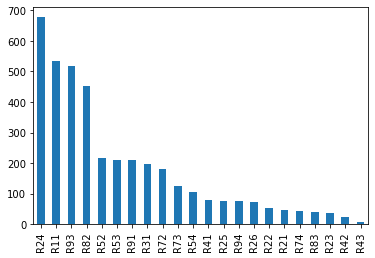

In [145]:
counts_yes08 = yes_08['Region'].value_counts()
counts_yes08.plot(kind = 'bar')

<AxesSubplot:>

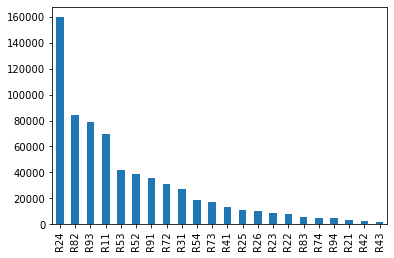

In [146]:
counts_no08 = not_08['Region'].value_counts()
counts_no08.plot(kind = 'bar')

## 8. Data anomaly: Large claim number

**[Context for Task 8]**

The largest claim number is 16, which is unusual for this data set. Try to find reason to explain such anomaly.

**[Instructions]**

- No instruction

### Comment
12 small claims. Not part of the above group (new cars brand B12)

### Sample Code

In [152]:
pol_clm_db [pol_clm_db['ClaimNb'] == 16]

,index,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,Exposure2
321248,321248,2241683,16,0.33,D,4.0,12.0,52.0,50.0,B1,Regular,824.0,R91,35529.37,0.33


#### All the characteristics of this policy are well within the percentiles, only Vehicle Age is above Q3

In [154]:
35529.37/16

2220.585625

In [155]:
pol_clm_db [pol_clm_db['ClaimAmount'] > 0]['ClaimAmount'].mean()

2401.748576812043

#### looking at the original claims

##### they are all under 10,000, some very small

In [158]:
claims_original[claims_original['IDpol']== 2241683]

,IDpol,ClaimAmount
26207,2241683.0,809.31
26209,2241683.0,4500.00
26213,2241683.0,1628.50
26358,2241683.0,1987.42
26359,2241683.0,1520.00
26370,2241683.0,101.66
26372,2241683.0,127.74
26374,2241683.0,2093.85
26387,2241683.0,1500.00
26388,2241683.0,1965.60


##### Can several cars fall under the same policy (policy-object) for example a fleet?  Otherwise this is clearly an outlier

## 9. Dealing with outliers

**[Context for Task 9]**

Some policy contains certainly outliers (large claim count), and look very suspiciously like either poor data or fraudulent activity. Given the fields in the input data, we'll never be able to fully ascertain the true cause. The options are:

1. Leave the data and hope any resulting model is unaffected. It may be a question of selecting a model specifically to be immune to this type of data.
2. Remove these suspicious records from the data.
3. Keep them but manually alter the data, e.g. cap the number of claims at 3 or 4, for example.

For the time being, we will cap the number of claims at 4 in modeling part. In fact, it'll be interesting to fit and assess any model with and without these extreme observations, to see what difference it makes.

**[Instructions]**

- Correct for those policy whose exposures are bigger than one year (by setting them equal to 1) since all observations are within one accounting year as per the data description. 
- It's easy to notice that 9 policies have more than 4 claims, the maximal number being 16. Please cap these values by 4 since these big values are likely to be data quote errors or fraud.

### Comment
Exposure was corrected above
now I can drop and rename the column

In [164]:
pol_clm_db['Exposure']= pol_clm_db['Exposure2']

In [165]:
pol_clm_db = pol_clm_db.drop('Exposure2', axis = 1)

In [166]:
pol_clm_db['Exposure'].describe()

count    678013.000000
mean          0.528545
std           0.364081
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           1.000000
Name: Exposure, dtype: float64

In [167]:
pol_clm_db.loc[pol_clm_db['ClaimNb']>4, 'ClaimNb'] = 4

In [168]:
pol_clm_db['ClaimNb'].describe()

count    678013.000000
mean          0.053179
std           0.237954
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: ClaimNb, dtype: float64

## 10. One-way analysis

**[Context for Task 10]**

A one-way analysis summarizes insurance statistics, such as frequency or loss ratio, for each value of each explanatory variable.

**[Instructions]**

- Read the function below for the one-way analysis, use it for variable "Area" and see what you can find. Also you can play it with other variables and try to extract business insights from the plots.

### Comment
- Area has an upward trend of frequency but slightly downward in severity. Maybe smaller cars in a higher populated are.
- Driving age shows a fast decline of frequency with age, then upwards before stabilizing. In older ages there are too few observations to make conclusions. Severity stabilizes quickly after the youngest years.
- Bonus malus shous a clearly upward trend in frequency


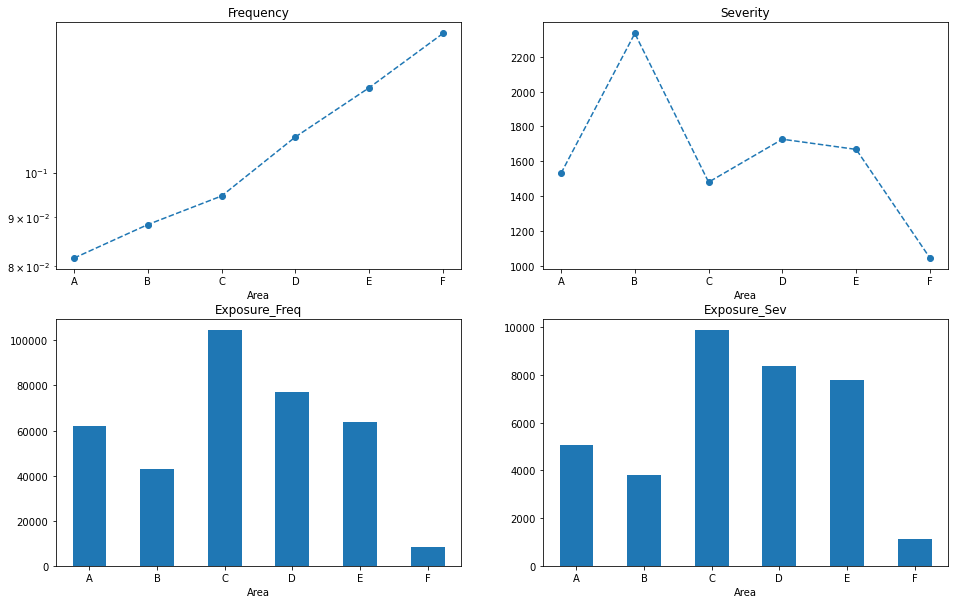

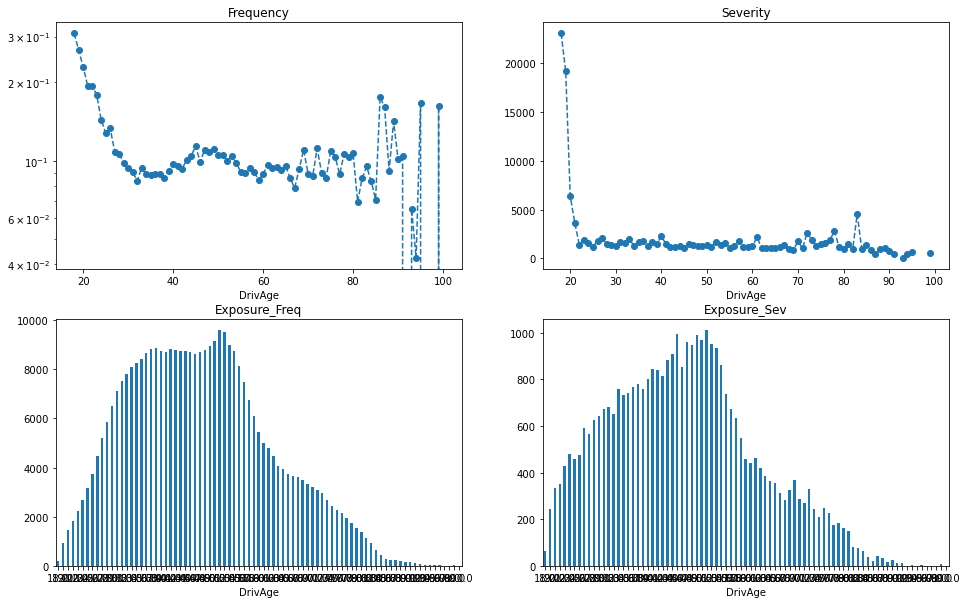

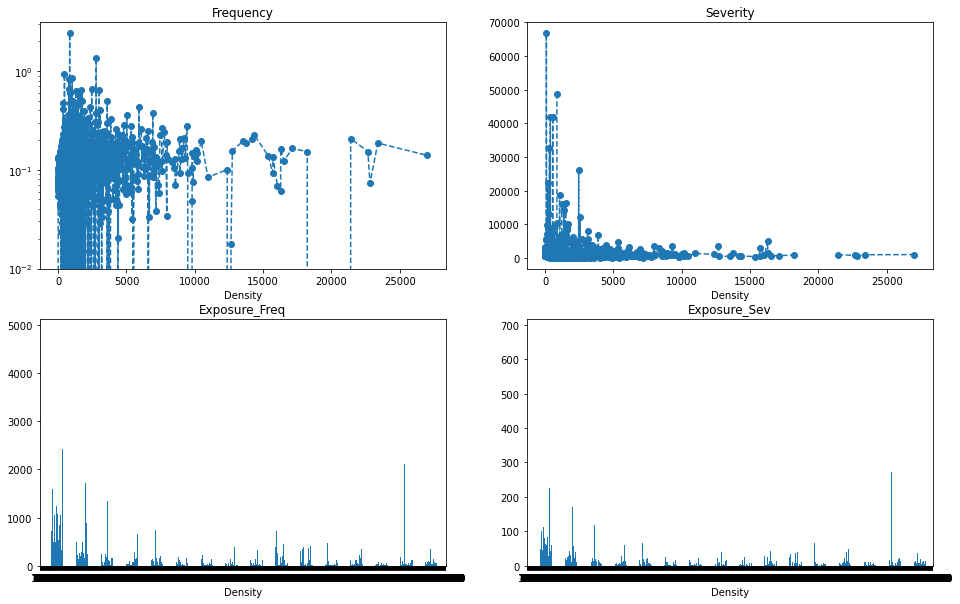

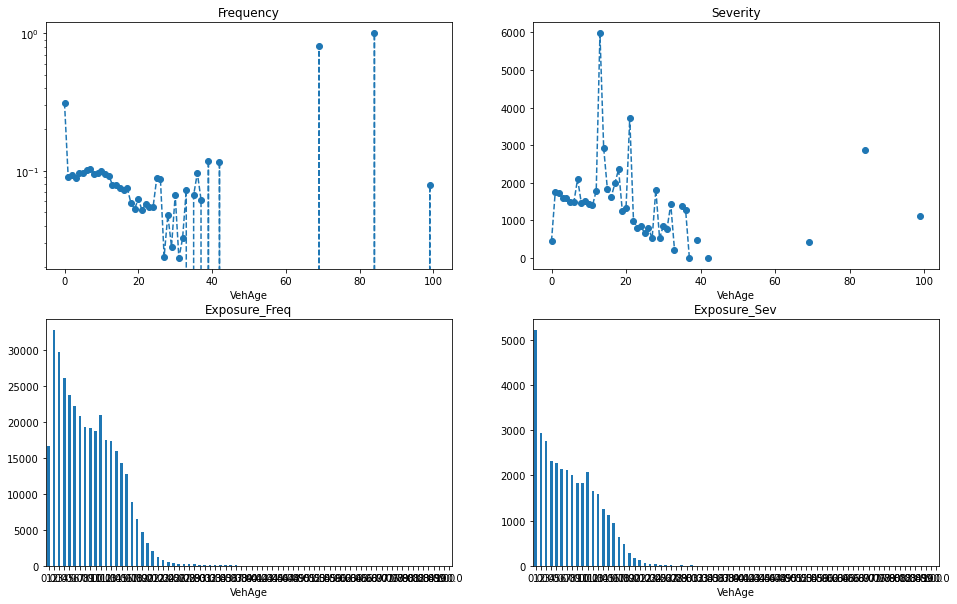

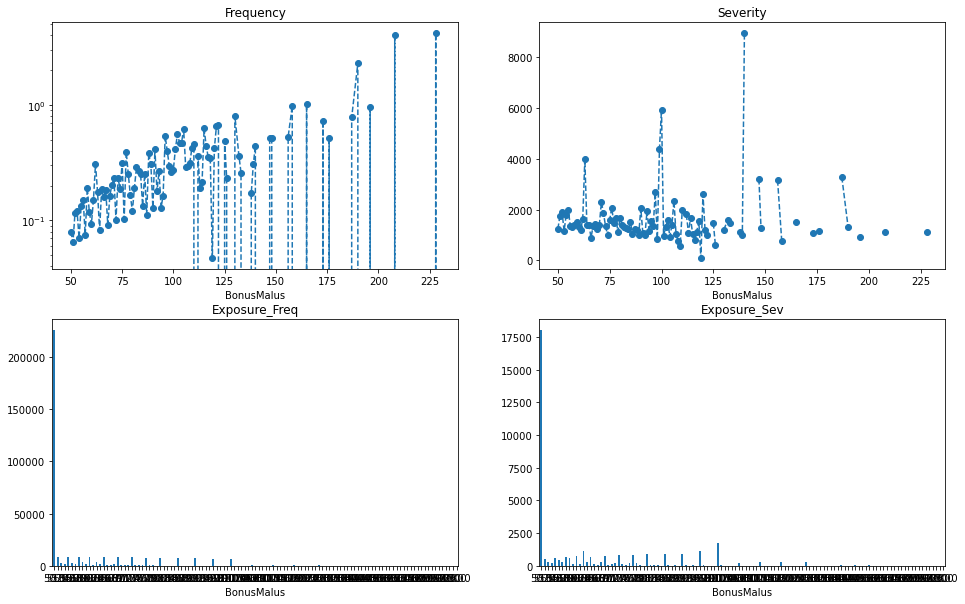

In [173]:
def one_way_analysis(db, ow_var, expo_fr, expo_sev, response_fr, response_sev):
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

    response_fr    = db.groupby(ow_var)[response_fr].sum()
    response_sev   = db.groupby(ow_var)[response_sev].sum()
    expo_fr        = db.groupby(ow_var)[expo_fr].sum()
    expo_sev       = db.groupby(ow_var)[expo_sev].sum()
    ratio_fr       = response_fr / expo_fr
    ratio_sev      = response_sev / expo_sev
    
    axes[0,0].title.set_text('Frequency')
    axes[0,1].title.set_text('Severity')
    axes[1,0].title.set_text('Exposure_Freq')
    axes[1,1].title.set_text('Exposure_Sev')
    axes[0,0].set_yscale('log')
    
    ratio_fr.plot(rot=0, ax=axes[0,0], style='o--')
    expo_fr.plot.bar(rot=0, ax=axes[1,0])
    
    ratio_sev.plot(rot=0, ax=axes[0,1], style='o--')
    expo_sev.plot.bar(rot=0, ax=axes[1,1])


one_way_analysis(pol_clm_db, 'Area' , 'Exposure', 'ClaimNb', 'ClaimNb', 'ClaimAmount')

one_way_analysis(pol_clm_db, 'DrivAge' , 'Exposure', 'ClaimNb', 'ClaimNb', 'ClaimAmount')

one_way_analysis(pol_clm_db, 'Density' , 'Exposure', 'ClaimNb', 'ClaimNb', 'ClaimAmount')

one_way_analysis(pol_clm_db, 'VehAge' , 'Exposure', 'ClaimNb', 'ClaimNb', 'ClaimAmount')

one_way_analysis(pol_clm_db[ pol_clm_db['BonusMalus'] > 0 ], 'BonusMalus' , 'Exposure', 'ClaimNb', 'ClaimNb', 'ClaimAmount')

## 11. Log transformation

**[Add Context for Task 11]**

Observation from one-way analysis:
1. The marginal empirical frequency is monotonically increasing for the area code, suggesting that the feature component Area is ordinal.
2. The marginal frequency is decreasing in vehicle age, and it has a "U" shape in driver's age (until age 50)
3. We see that the frequency is monotonically increasing in the log density of the population
4. By far the most explanatory feature component for frequency modeling is the bonus-malus level


Based on the observation above, we can do some simplification for the explainable features.

**[Update Instructions]**

- For variable `Area`, we found that, in frequency plot, the overall trend is upward. Please map the alphabet order into numerical order using dictionary `mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}` 
- Capping variable `VehPower`, `VehAge`, `DrivAge` and `BonusMalus` at 9, 20, 90, 150, respectively, since the volume above these levels is negligible.
- Log transformation for variable `Density`

### Sample Code

### Comment
No problems making factor bins

In [179]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6} 
pol_clm_db['Area']          =  pol_clm_db['Area'].map(mapping)

In [180]:
pol_clm_db.loc[pol_clm_db['VehPower']>9, 'VehPower'] = 9
print(pol_clm_db['VehPower'].max())

pol_clm_db.loc[pol_clm_db['VehAge']>20, 'VehAge'] = 20
print(pol_clm_db['VehAge'].max())

pol_clm_db.loc[pol_clm_db['DrivAge']>90, 'DrivAge'] = 90
print(pol_clm_db['DrivAge'].max())

pol_clm_db.loc[pol_clm_db['BonusMalus']>150, 'BonusMalus'] = 150
print(pol_clm_db['BonusMalus'].max())

9.0
20.0
90.0
150.0


In [181]:
import numpy as np
pol_clm_db['LogDensity']   = round(np.log(pol_clm_db['Density'] ), 0)
#round(np.log(pol_clm_db['Density']))

In [182]:
pol_clm_db.head(5)

,index,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,LogDensity
0,0,1,1,0.10,4,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0,7.0
1,1,3,1,0.77,4,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0,7.0
2,2,5,1,0.75,2,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,0.0,4.0
3,3,10,1,0.09,2,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0,4.0
4,4,11,1,0.84,2,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0,4.0


## 12. Two-way analysis

**[Add Context for Task 12]**

We only do the numerical correlation in this case; It's also possible to get the correlation for categorical variables (e.g. Cramér's V)

**[Add Instructions for Task 12]**

- Caculate correlation value for numberical variables

### Comment:
I emulated R's corrplot
Area and density show a high correlation, This is expected, but doesn't necessarily means they are collinear.  We can analyze further in a model
    

### Sample Code

In [188]:
pol_clm_db_corr = pol_clm_db.copy()

vars = ['Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density'] #  'Area': catogory

corr_db = pol_clm_db_corr[vars].corr()



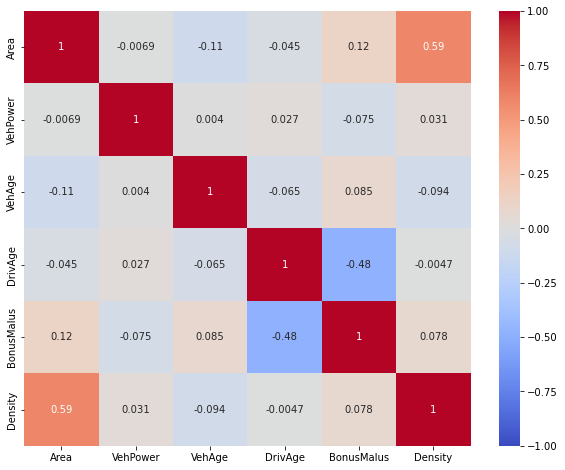

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_db, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## 13. Large loss analysis

**[Context for Task 13]**

A large loss is a claim event that typically occurs with a low frequency but large severity. Some negative impact on the risk modeling from large loss could be:
- It's difficult to estimate large losses in the tail’s distribution between different years,
- It will bias the estimation because some specific segments can be largely influenced by large losses. 

In this section, we will discuss how to deal with large cost in order to model a more stable quantity.

**[Add Instructions]**

- Plot the empirical loss distribution for the whole data range and tail part. For tail threshold, one can choose certain value that he/she think it appropriate.

### Comment
The large losses make the analysis difficult.
I chose a 20,000 euro treshold, close to the 99 quantile

### Sample Code

### Plot of the distribution of N_claims and Amount

<AxesSubplot:>

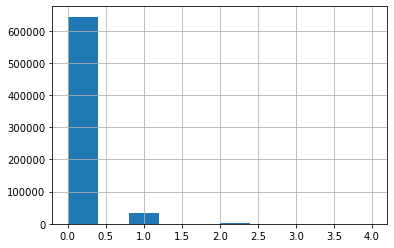

In [196]:
pol_clm_db['ClaimNb'].hist() 

<AxesSubplot:>

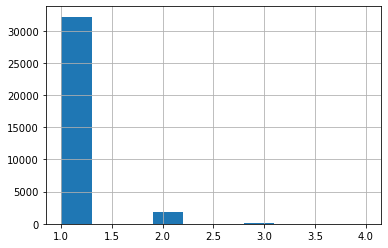

In [197]:
pol_clm_db[pol_clm_db['ClaimNb']>0]['ClaimNb'].hist() 

<AxesSubplot:>

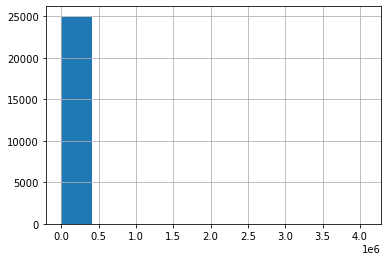

In [198]:
pol_clm_db[pol_clm_db['ClaimAmount']>0]['ClaimAmount'].hist() 

#### a problem to visualize indeed

In [200]:
pol_clm_db[pol_clm_db['ClaimAmount']>0]['ClaimAmount'].describe().round(3)

count      24944.000
mean        2401.749
std        30264.754
min            1.000
25%          749.788
50%         1172.000
75%         1346.400
max      4075400.560
Name: ClaimAmount, dtype: float64

In [201]:
pol_clm_db[pol_clm_db['ClaimAmount']>0]['ClaimAmount'].quantile(.99)

18278.38229999995

In [202]:
sev_db = pol_clm_db.loc[pol_clm_db['ClaimAmount']>0,['ClaimNb','ClaimAmount']]

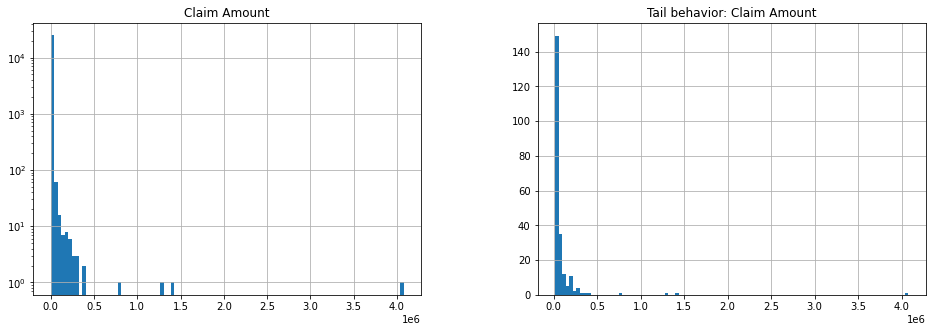

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sev_db.hist(column='ClaimAmount', bins=100, log=True, ax=axes[0])
sev_db[sev_db['ClaimAmount']>20000].hist(column='ClaimAmount', bins=100, ax=axes[1])

axes[0].title.set_text('Claim Amount')
axes[1].title.set_text('Tail behavior: Claim Amount')

## 14. Large loss analysis: Identifying thresholds

**[Context for Task 14]**


**[Instructions]**

- Identify threshold for large claim. Please note there are lots of ways to find the threshold, one can choose whatever method he/she thinks appropriate.
- In this approach, we first get the percentage of claim amount over certain threshold, then we compute the percentage of claims number over the threshold. Finally, we define the metric, which is percentage of claim amount over threshold divided by percentage of claim number over threshold.

**[Insert Hints Below]**

- The approach here can be different as long as it can select a reasonable threshold.

### Comment
- Treshold is 20,000
- 30% of the total claim amount is above this treshold
- only 230 claims

- In this example the factor integrates the probability of having a large claim.  Because the number of claims is too small to draw conclusions, another option is to spread this 30% over all policies.

### Sample Code

Above, I choose 20,000 euro as the treshold, a round amount close to the 99% quantile

In [211]:
large_claim_tresh = 20000

In [212]:
sev_db['ClaimAbove'] =  sev_db['ClaimAmount']-large_claim_tresh
sev_db

,ClaimNb,ClaimAmount,ClaimAbove
66,1,303.00,-19697.00
93,1,1981.84,-18018.16
199,1,1456.55,-18543.45
205,2,10834.00,-9166.00
223,1,3986.67,-16013.33
...,...,...,...
677203,1,1324.40,-18675.60
677475,1,1769.88,-18230.12
677499,1,1288.28,-18711.72
677516,2,12230.40,-7769.60


In [213]:
sev_db['large_claim'] = 1
sev_db.loc[sev_db['ClaimAbove']<0, 'large_claim'] = 0


### Identify Large claims.


#### Only the excess is separated.  the part of the claim below the treshold remains as a regular claim

In [216]:
sev_db.loc[sev_db['ClaimAbove']<0, 'ClaimAbove'] = 0
sev_db['ClaimBelow'] = sev_db['ClaimAmount'] - sev_db['ClaimAbove']
sev_db

,ClaimNb,ClaimAmount,ClaimAbove,large_claim,ClaimBelow
66,1,303.00,0.0,0,303.00
93,1,1981.84,0.0,0,1981.84
199,1,1456.55,0.0,0,1456.55
205,2,10834.00,0.0,0,10834.00
223,1,3986.67,0.0,0,3986.67
...,...,...,...,...,...
677203,1,1324.40,0.0,0,1324.40
677475,1,1769.88,0.0,0,1769.88
677499,1,1288.28,0.0,0,1288.28
677516,2,12230.40,0.0,0,12230.40


check: should be 0

In [218]:
round(sev_db['ClaimBelow'].sum() + sev_db['ClaimAbove'].sum() - sev_db['ClaimAmount'].sum())

0

### Build metric: 
first get the percentage of claim amount over certain threshold, then we compute the percentage of claims number over the threshold. Finally, we define the metric, which is percentage of claim amount over threshold divided by percentage of claim number over threshold.

#### here I assume the percentage is: total amount above / total amount.  

In [221]:
total_large = sev_db['ClaimAbove'].sum()
total = sev_db['ClaimAmount'].sum()
factor_large_claim_amt = total_large / total
factor_large_claim_amt

0.2957644246607698

In [222]:
total_large = sev_db['large_claim'].sum()
total = len(sev_db)
factor_large_claim_n = total_large / total
print(total_large, total,factor_large_claim_n)

230 24944 0.009220654265554842


In [223]:
large_claim_metric = factor_large_claim_amt / factor_large_claim_n
large_claim_metric

32.076294820601056

## 15. Plotting distributions

**[Add Context for Task 15]**

Visualize both attritional distribution and excess distribution.

**[Instructions]**

- Plot both attritional distribution and excess distribution given the large loss threshold equals 190,000

### Comment
- With the 190000 treshold the percentage abouve is now 13%
- The attritional loss plot shows a more stable distribution

### make dataset now with treshold 190,000

In [229]:
large_claim_tresh = 190000
sev_db['ClaimAbove'] =  sev_db['ClaimAmount']-large_claim_tresh
sev_db
sev_db['large_claim'] = 1
sev_db.loc[sev_db['ClaimAbove']<0, 'large_claim'] = 0
sev_db.loc[sev_db['ClaimAbove']<0, 'ClaimAbove'] = 0
sev_db['ClaimBelow'] = sev_db['ClaimAmount'] - sev_db['ClaimAbove']
sev_db

,ClaimNb,ClaimAmount,ClaimAbove,large_claim,ClaimBelow
66,1,303.00,0.0,0,303.00
93,1,1981.84,0.0,0,1981.84
199,1,1456.55,0.0,0,1456.55
205,2,10834.00,0.0,0,10834.00
223,1,3986.67,0.0,0,3986.67
...,...,...,...,...,...
677203,1,1324.40,0.0,0,1324.40
677475,1,1769.88,0.0,0,1769.88
677499,1,1288.28,0.0,0,1288.28
677516,2,12230.40,0.0,0,12230.40


In [230]:
total_large = sev_db['ClaimAbove'].sum()
total = sev_db['ClaimAmount'].sum()
factor_large_claim_amt = total_large / total
print(total_large, total,factor_large_claim_amt)

7937579.42 59909216.50000001 0.13249346066810938


In [231]:
total_large = sev_db['large_claim'].sum()
total = len(sev_db)
factor_large_claim_n = total_large / total
print(total_large, total,factor_large_claim_n)

20 24944 0.0008017960230917255


In [232]:
# attritional distribution

In [233]:
# excess distribution

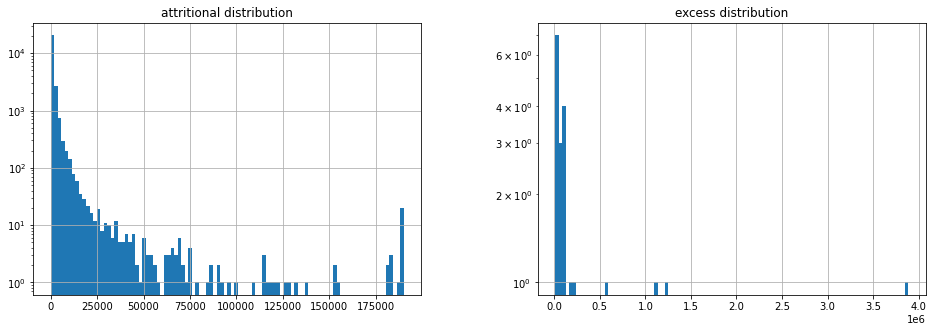

In [234]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sev_db.hist(column='ClaimBelow', bins=100, log=True, ax=axes[0])
sev_db[sev_db['ClaimAbove']>0].hist(column='ClaimAbove', bins=100, log=True, ax=axes[1])


axes[0].title.set_text('attritional distribution')
axes[1].title.set_text('excess distribution')